<img src="./Images/HW07_P02.png" width="700px">
<img src="./Images/HW07_P02(what_to_include).png" width="700 px">

In [28]:
# import dependencies 
import matplotlib.pyplot as plt 
import numpy as np

# Set size parameters for plots 
plt.rcParams.update({
    'figure.titlesize': 18,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 11
})

<img src="./Images/HW07_P02(1).png" width="700px">


In [29]:
# ---- Program to solve the stationary Schrödinger equation using FDM for V(x) ---- 
def solve_SSE(Vp, xmin, xmax, n):
    ''' 
    Function to solve stationary Schrödinger equation for a given potential V(x)
    Arguments: 
        Vp: potential (function)
        xmin: minimum x value, left end-point
        xmax: maximum x value, right end-point
        n: number of endpoints
    Returns: 
        x (ndarray): set of grid points 
        y (ndarray): eigenvectors
        Ei (ndarray): diagonal matrix of eigenvalues 
        n_states (int): number of bound states
    '''
    # --- create grid ---
    h = (xmax - xmin) / (n-1)   # spacing
    x = np.linspace(xmin, xmax, n)  # grid points 
    V_vals = Vp(x)  # potential points on grid 

    # --- create matrix A ---
    A = np.zeros((n,n))     # init to all zeros 

    # diagonal values: 1/h^2 + V(x_k)
    for k in range(n):
        A[k,k] = 1.0/h**2 + V_vals[k]

    # off diagonals: -1/(2h^2)
    for k in range(n-1):
        A[k, k+1] = -1.0/(2.0*h**2)
        A[k+1, k] = A[k, k+1]

    # --- Eigenvalues and Eigenvectors ---
    Ei, y = np.linalg.eigh(A)   # Ei = sorted list of eigenvals, y = ith eigenfunction

    # sort ascending - eigh should sort automatically, but sort to be sure. 
    ind = np.argsort(Ei)
    Ei = Ei[ind]
    y = y[:,ind]

    # --- Count bound states (Ei < V(xmax)) ---
    Emax = Vp(xmax)
    n_states = 0
    for k in range(n):
        if Ei[k] > Emax: 
            break
        n_states += 1

    # -- Normalization with Simpson's Rule ---
    # S[i] holds norm factor for state i 
    S = np.zeros(n_states)

    # Simpson rule for each bound state
    for i in range(n_states):
        S_i = 0.0
        for k in range(1, n-1, 2): 
            S_i += 4.0 * y[k, i]**2 
            S_i += 2.0 * y[k+1, i]**2 

        S_i += y[0, i]**2 -y[n-1, i]**2 

        S[i] = np.sqrt(S_i * h/3.0)

    # apply normalization 
    for i in range(n_states):
        y[:, i]/=S[i]
    
    return x, y, Ei, n_states


<img src = "./Images/HW07_p02(2).png" width="700px">

Bound state energies:
1: 0.221992
2: 0.879673
3: 1.941135
4: 3.304127


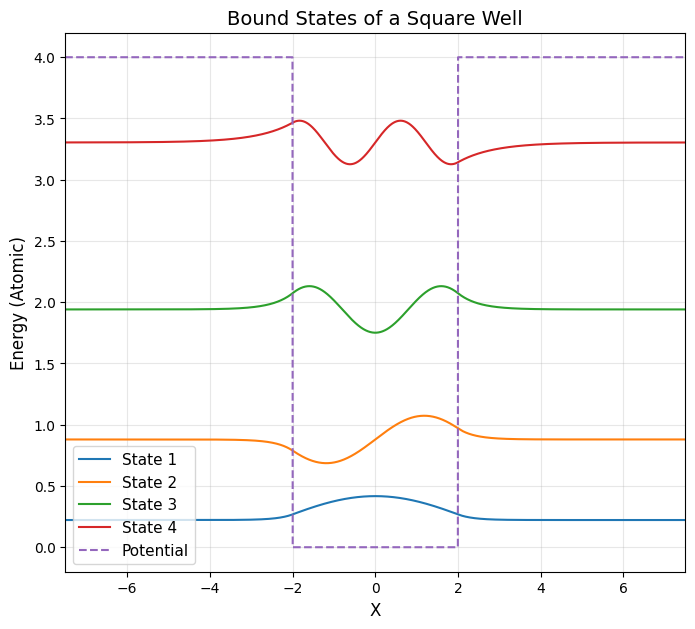

In [30]:
# ---- Square well potential ---- 
def V(x, a=2, V0=4): 
    ''' 
    Finite square well potential: 
    V = 0 inside well, |x| <= a 
    V = V0 outsize 
    '''
    return np.where(np.abs(x) <= a, 0.0, V0)

# run solve_SSE for finite square well and define results
# play around with input parameters for xmin, xmax, and n
x, y, Ei, n_states = solve_SSE(V,-10, 10, 4000) 

# print and plot results
print("Bound state energies:")
for i in range(n_states):
    print(f"{i+1}: {Ei[i]:.6f}")

plt.figure(figsize=(8,7))
plt.title("Bound States of a Square Well")
plt.xlabel("X")
plt.ylabel("Energy (Atomic)")
scale = 0.3
for i in range(n_states): 
    plt.plot(x, y[:, i] * scale + Ei[i], label=f"State {i+1}")
plt.plot(x, V(x), '--', label="Potential")
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.xlim(-7.5, 7.5) # zoom in a bit on the results
plt.show()


<img src="./Images/HW07_P02(3).png" width="700px">

In [31]:
# ---- Increasing well depth ---- 

# define different arrays with square well potentials, potential increases by a factor of 10 each time
V10 = lambda x: V(x, V0=10)
V100 = lambda x: V(x, V0=100)
V1000 = lambda x: V(x, V0=1000)
V10000 = lambda x: V(x, V0=10000)
V1e5 = lambda x: V(x, V0=1e5)
V1e6 = lambda x: V(x, V0=1e6)

# give the new arrays to solve_SSE and define the results of each 
x10, y10, E10, n_states10 = solve_SSE(V10, -10, 10, 4000)
x100, y100, E100, n_states100 = solve_SSE(V100, -10, 10, 4000)
x1000, y1000, E1000, n_states1000 = solve_SSE(V1000, -10, 10, 4000)
x10000, y10000, E10000, n_states10000 = solve_SSE(V10000, -10, 10, 4000)
x1e5, y1e5, E1e5, n_states1e5 = solve_SSE(V1e5, -10, 10, 4000)
x1e6, y1e6, E1e6, n_states1e6 = solve_SSE(V1e6, -10, 10, 4000)

# list of analytical infinite square well energy levels to compare to as well gets deeper (approaches infinity)
E_inf = [(n**2)*np.pi**2/(32) for n in range(1, 5)]

Analytic infinite well energies: 

n = 1:  E = 0.308425
n = 2:  E = 1.233701
n = 3:  E = 2.775826
n = 4:  E = 4.934802

Simulated infinite well energies:

--- V0 = 10 ---
n = 1:  E = 0.249187
n = 2:  E = 0.994116
n = 3:  E = 2.225999
n = 4:  E = 3.926329

--- V0 = 100 ---
n = 1:  E = 0.287560
n = 2:  E = 1.150121
n = 3:  E = 2.587328
n = 4:  E = 4.598571

--- V0 = 1000 ---
n = 1:  E = 0.301451
n = 2:  E = 1.205796
n = 3:  E = 2.713009
n = 4:  E = 4.823049

--- V0 = 10000 ---
n = 1:  E = 0.305972
n = 2:  E = 1.223883
n = 3:  E = 2.753719
n = 4:  E = 4.895456

--- V0 = 100000 ---
n = 1:  E = 0.307239
n = 2:  E = 1.228952
n = 3:  E = 2.765125
n = 4:  E = 4.915734

--- V0 = 1000000 ---
n = 1:  E = 0.307471
n = 2:  E = 1.229880
n = 3:  E = 2.767213
n = 4:  E = 4.919445


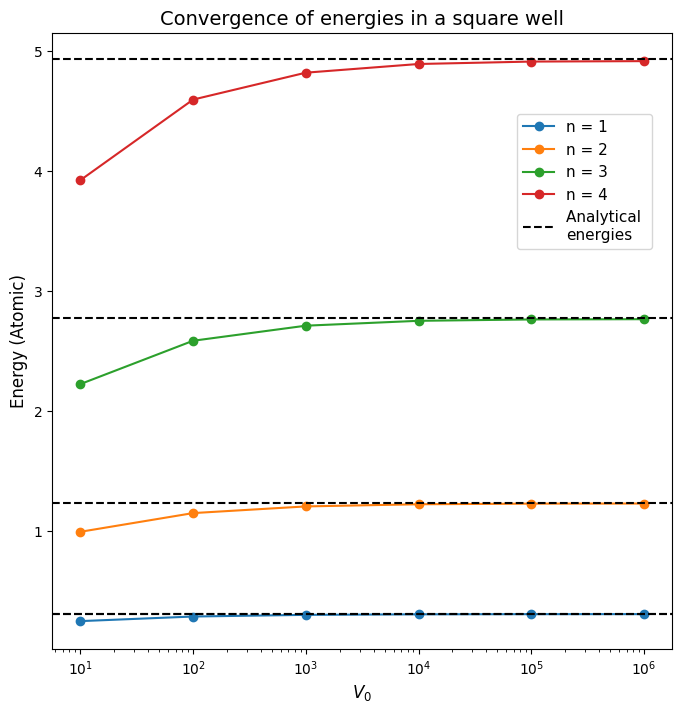

In [32]:
# --- Print the analytical and simulated energies ---
print("Analytic infinite well energies: \n")
for n, E in enumerate(E_inf, start=1):
    print(f"n = {n}:  E = {E:.6f}")

Vs = [10, 100, 1000, 10000, 1e5, 1e6]   # list of V values 
Es = [E10, E100, E1000, E10000, E1e5, E1e6]     # list of the result arrays 

# dictionary of the labels and their associated result arrays to use in print function below
results = {
    "V0 = 10": E10,
    "V0 = 100": E100, 
    "V0 = 1000": E1000, 
    "V0 = 10000": E10000, 
    "V0 = 100000": E1e5,
    "V0 = 1000000": E1e6
    }

# print simulated results
def print_results(r):
    ''' 
    Function that prints the resulting r number of energies of each state 
    r = number of bound states to print 
    '''
    for name, val in results.items(): 
        print(f"\n--- {name} ---")
        for n in range(r):  # go through the corresponding n number of states for each results array 
            print(f"n = {n+1}:  E = {val[n]:.6f}")
        
print("\nSimulated infinite well energies:")
print_results(4)

# plot figure showing higher potential iteration approaching the analytical energy values 
plt.figure(figsize=(8,8))
plt.title("Convergence of energies in a square well")
for i in range(4):
    plt.plot(Vs, [E[i] for E in Es], 'o-', label=f"n = {i+1}")

for i in range(4): 
    plt.axhline(E_inf[i], color='k', linestyle='--')
    if i==0:
        plt.axhline(E_inf[i], color='k', linestyle='--', label="Analytical \nenergies")

plt.xscale("log")
plt.xlabel(r"$V_0$")
plt.ylabel("Energy (Atomic)")
plt.legend(loc=(0.75, 0.65))
plt.show()

<img src="./Images/HW07_P02(4).png" width="700 px">

In [33]:
# ---- Harmonic oscillator potential ---- 
# define potental function 
def V_harmonic(x): 
    ''' 
    parabolic potential: 
    V = 0 inside parabola, x^2/2
    '''
    x = x**2/2
    return x
# -- Compute analytic values for first 6 energy levels --
E_analytic = [(n+0.5) for n in range(0, 6)]

# -- Compute the SSE with harmonic osc function --
x_h, y_h, E_h, n_states_h = solve_SSE(V_harmonic, -10, 10, 4000)

Analytic Harmonic Osc energies:
1: 0.500000
2: 1.500000
3: 2.500000
4: 3.500000
5: 4.500000
6: 5.500000

Simulated Harmonic Osc energies:
1: 0.499999
2: 1.499996
3: 2.499990
4: 3.499980
5: 4.499968
6: 5.499952


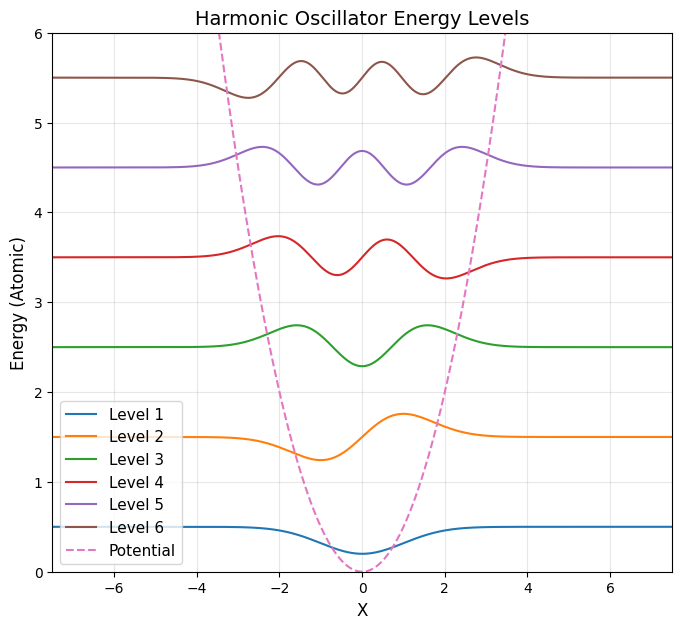

In [34]:
# -- Print analytic and simulated values of first 6 energy levels --
print("Analytic Harmonic Osc energies:")
for i in range(6):
    print(f"{i+1}: {E_analytic[i]:.6f}")

print("\nSimulated Harmonic Osc energies:")
for i in range(6):
    print(f"{i+1}: {E_h[i]:.6f}")

# Plot figure showing the potential and the energy levels 
plt.figure(figsize=(8,7)) 
plt.title("Harmonic Oscillator Energy Levels")
plt.xlabel("X")
plt.ylabel("Energy (Atomic)")
scale = 0.4 # scale factor for visibility 
for i in range(6): 
    plt.plot(x_h, y_h[:, i] * scale + E_h[i], label=f"Level {i+1}")
plt.plot(x_h, V_harmonic(x_h), '--', label="Potential")
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.ylim(0, 6)
plt.xlim(-7.5, 7.5)
plt.show()

In [37]:
# Orthogonality check 

# Use Simpson's rule to find the inner product of Psi 1 and Psi 2 (first two energy levels)
# Analytical value is ZERO if they are orthogonal, so result should be very, very small.

psi_1 = y_h[:,0] # column number = eigenstate number
psi_2 = y_h[:,1] 

h = x_h[1] - x_h[0] 

integrand = psi_1 * psi_2

S = integrand[0] + integrand[-1]
S += 4 * np.sum(integrand[1:-1:2])
S += 2 * np.sum(integrand[2:-1:1])
inner_prod = np.abs((h/3) * S)  # absolute value because an eigenfunction's sign is arbitrary 

print("Inner product of Psi 1 and Psi 2: ", inner_prod)



Inner product of Psi 1 and Psi 2:  9.476272211520248e-17
